 # Fitting Circles and Ellipsis (and Hyper Spheres and Hyper Ellipsoids)
 
This is a easy to visualize problem. Given a set of points, we look for the circle with the minimum radius such as it covers all the points. The problem is analogous with an ellipsis and it is extended to hyper dimensional spaces.
Also, it's useful in operations research for the facility location problems as well as a simple solution of the [circumscribed circle](https://en.wikipedia.org/wiki/Circumscribed_circle) (or ellipsis) given a polygon.

In order to find a solution to our problem, we will define our problems with [`cvxpy`](https://www.cvxpy.org), since we claim that the problem can be expressed in a convex form.

In [1]:
%matplotlib inline
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)

Initialize (pseudo)random values for 2D and 4D cases.

In [2]:
np.random.seed(1)
points2d = np.random.rand(25, 2)
points4d = np.random.rand(25, 4)

## Smallest Circle
This problem in its 2d form is known as the [smallest circle problem](https://en.wikipedia.org/wiki/Smallest-circle_problem). In the $n$ dimensional space we can represent the problem as follows:
$$
\begin{align}
minimize & \quad \quad r \\
s.t. & \quad \left | x_i - c \right| \leq r
\end{align}
$$

Where $r\in \mathbb{R}$, $c, x_i\in \mathbb{R^n}$ and $i\in \{1,\dots,N\}$ where $N$ is the number of points.
In the case of the circle, $n=2$.

(-0.18325536931975703,
 1.1080511425275137,
 -0.15701720019404383,
 1.1342893116532269)

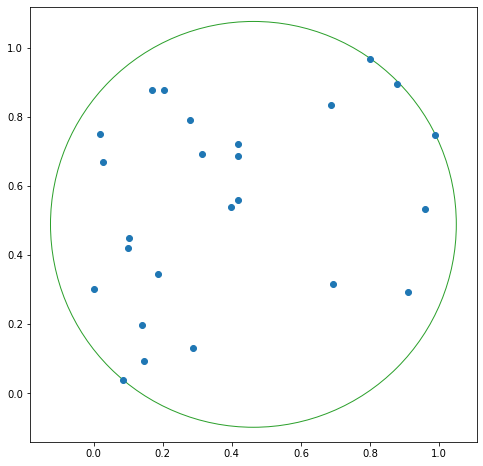

In [3]:
r = cp.Variable()
x = cp.Variable(2)
constraints = [cp.norm(d-x) <= r for d in points2d]
problem = cp.Problem(cp.Minimize(r),constraints)
problem.solve()

circle2 = plt.Circle(x.value, r.value, color='C2', fill=False, label="circle")
plt.gca().add_patch(circle2)
plt.scatter(*points2d.T)
plt.axis("equal")

## Minimal Ellipsis
The definition of the ellipsiod can be seen in the [Convex Optimization Book](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf) Section 2.2.2, Euclidean balls and ellipsoids. In the book, one of the definitions of the ellipsoid is as follows:
$$
\mathcal{E}=\left\{ x_c + Au \, | \, \|u\|_2 \leq 1 \right\}
$$

Renaming a little bit the variables and defining the log determinant function as our objective we can get the following definition:

$$
\begin{align}
minimize & \quad \text{log} \, {det} A \\
s.t. & \quad \left \| Ax+b \right\|_2 \leq1
\end{align}
$$

Where $A \in \mathbf{S}_+$, and $b, x \in \mathbb{R}^n$, $b$ is the center of the ellipsoid. $n=2$ in the case of the ellipsis.

You can think as minimizing the determinant, as if you remember from your linear algebra course, it represents the volume of the vectors that define it (more at the [wikipedia page](https://en.wikipedia.org/wiki/Determinant#Geometric_meaning)).

(-0.1813908200172111,
 1.0764560381236727,
 -0.06799951032808409,
 1.07062508532239)

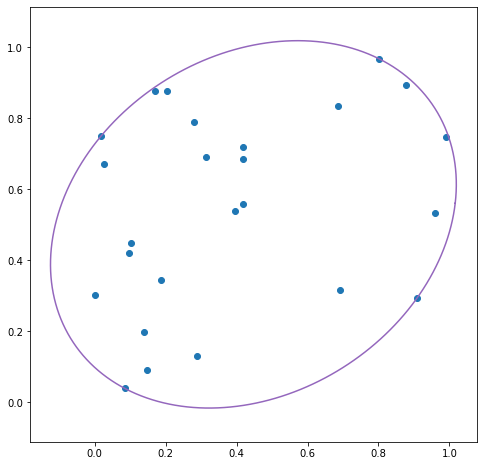

In [4]:
n, m = points2d.shape
A = cp.Variable((m,m), PSD=True)
b = cp.Variable((m,1))
cost = cp.Maximize(cp.log_det(A))
constraints = [ cp.norm(A@points2d.T + b, 2, 0) <= 1 ]
prob = cp.Problem(cost,constraints)
prob.solve()

theta = np.linspace(0, 2 * np.pi, 200)
sphere_pts = np.c_[np.cos(theta)-b.value[0], np.sin(theta)-b.value[1]]
ellipse = np.linalg.solve(A.value, sphere_pts.T)
plt.plot(ellipse[0, :], ellipse[1, :], c='C4', label="ellipse")
plt.scatter(*points2d.T)
plt.axis("equal")

# Hyper Sphere and Hyper Ellipsoid
You can easily see that the equations can be easily extended to $n$ dimensional spaces.

## H-Sphere 

In [5]:
r = cp.Variable()
x = cp.Variable(4)
constraints = [cp.norm(d-x) <= r for d in points4d]
problem = cp.Problem(cp.Minimize(r),constraints)
problem.solve()
print(f"radius: {r.value}\n")
print(f"center: {x.value}\n")

radius: 0.7946096330057346

center: [0.36367221 0.52685288 0.35538841 0.51176743]



## H-Ellipsoid 

In [6]:
n, m = points4d.shape
A = cp.Variable((m,m), PSD=True)
b = cp.Variable((m,1))
cost = cp.Maximize(cp.log_det(A))
constraints = [ cp.norm(A@points4d.T + b, 2, 0) <= 1 ]
prob = cp.Problem(cost,constraints)
prob.solve()

print(f"center: {b.value.flatten()}\n")
print(f"A determinant: {np.linalg.det(A.value)}\n")
print(f"A: {A.value}\n")

center: [-0.64435352 -0.5539483  -0.60157114 -0.60288696]

A determinant: 3.9905514372215722

A: [[ 1.42821457  0.09989915  0.05468621 -0.0093663 ]
 [ 0.09989915  1.36991693 -0.27079593  0.03880243]
 [ 0.05468621 -0.27079593  1.60047126 -0.19558941]
 [-0.0093663   0.03880243 -0.19558941  1.35251526]]

